# Dry Bean Classification

<b>Research Question:</b> The objective of this analysis is to determine the efficacy of classifying dry bean varieties based on quantifiable physical characteristics, utilizing statistical and machine learning methodologies to assess the precision and reliability of the classification models.

<b>Data:</b> 
The dataset for this research is sourced from the University of California, Irvine. The original research involved taking images of dry beans and extracting features including area, perimeter, major axis length, minor axis length, aspect ratio, eccentricity, convex area, extent, solidity, roundness, compactness, and shape factor, as well as each bean's class label.

Dry Bean. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.

<b>Methodology</b>: This study will employ two clustering models to classify dry bean varieties based on measurable physical and quantifiable characteristics. The models to be compared are:

-  K-Means Clustering
-  Agglomerative Clustering

K-Means is efficient for large datasets with spherical clusters, while Agglomerative Clustering excels with various cluster shapes and smaller datasets. By comparing the two, we can determine which method provides higher accuracy. This will ensure that our clustering results are more reliable and meaningful.

Each model's performance will be evaluated through a series of metrics such as accuracy, precision, recall, and F1-score to determine their effectiveness in classifying the dry bean varieties. Comparisons will be made to determine which model most accurately groups the beans into their respective categories.

The outcome of this comparative analysis will provide insights into the clustering effectiveness of various algorithms on the dry bean dataset, with the ultimate aim to contribute valuable information for agricultural scientists and industry professionals focused on crop classification.

In [8]:
#=================================================-
#### Loading packages  ####

import warnings
# Suppress specific warnings
warnings.filterwarnings('ignore')

# Helper packages.
import pandas as pd
import numpy as np
import itertools

#Visualization packages 
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling packages from scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### Data Preparation & EDA

To begin our analysis, we will first import the dataset and conduct a preliminary exploration to understand its structure and key characteristics. This step includes examining variable types, checking for completeness, and summarizing the data with descriptive statistics. This foundational knowledge will guide our data preprocessing and analytical approaches.

In [9]:
#=================================================-
#### Loading data into Python  ####
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [10]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

The dataset comprises 13,611 individual observations, each characterized by 17 features.

The following is a summary of the features (all numeric other than class labels) in the data:

<b>Numeric Features:</b>

1. Area: The area of the bean in pixels.
2. Perimeter: The perimeter of the bean in pixels.
3. MajorAxisLength: The length of the major axis of the bean ellipse.
4. MinorAxisLength: The length of the minor axis of the bean ellipse.
5. AspectRatio: The ratio of the major axis to the minor axis.
6. Eccentricity: The eccentricity of the bean ellipse.
7. ConvexArea: The area of the convex hull of the bean.
8. EquivDiameter: The diameter of a circle with the same area as the bean.
9. Extent: The ratio of the bean area to the bounding box area.
10. Solidity: The ratio of the bean area to the convex hull area.
11. Roundness: A measure of the bean's roundness.
12. Compactness: The ratio of the perimeter squared to the area.
13. ShapeFactor1: A shape factor calculated using perimeter and area.
14. ShapeFactor2: A shape factor calculated using major and minor axes.
15. ShapeFactor3: A shape factor calculated using convex area and area.
16. ShapeFactor4: A shape factor calculated using convex area and perimeter.

<b>Categorical Features:</b>
1. Class: The class label of the bean, indicating its variety (e.g., Seker, Barbunya, Bombay).

From the display above the feature descriptions, it is clear that there are no missing values in the dataset. However, it is still necessary to explore the distribution of numerical features to understand their underlying patterns and potential impact on the clustering models. The first 16 features will be used to build our clustering models. The class labels will only be used for testing the accuracy of the models. All features will be explored below.

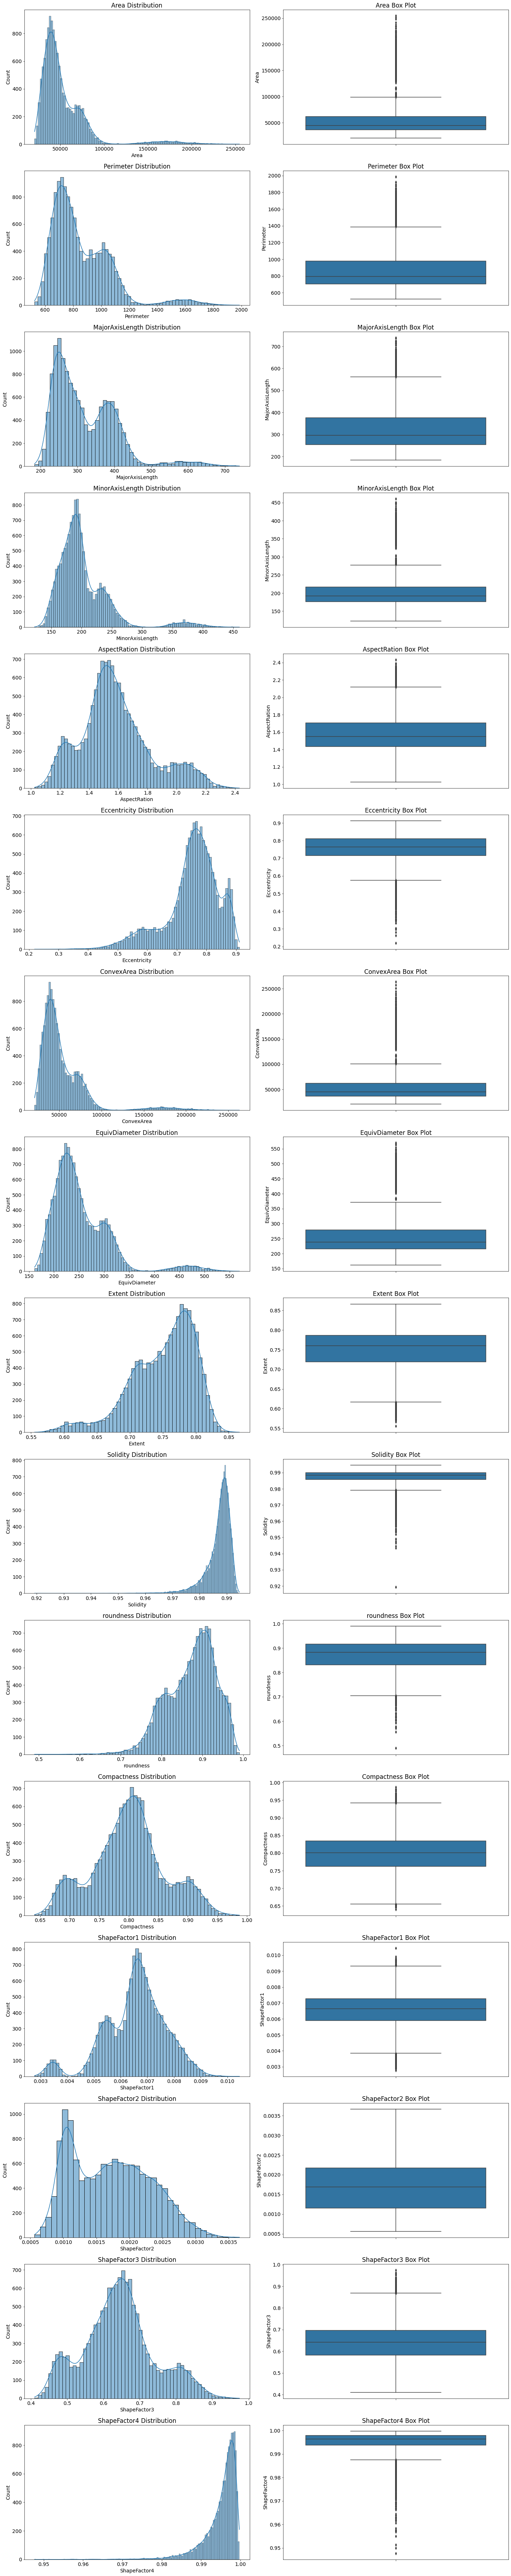

In [12]:
#=================================================-
#### Exploring the numerical variables  ####

# Remove the class label from dataframe
num_features = df.columns[:-1]  # Exclude the 'Class' column

# Set the default font size for all plot elements
plt.rcParams.update({'font.size': 14})

#Plot the Histograms and Box plot
plt.figure(figsize=(20, 100))
for i, feature in enumerate(num_features):
    plt.subplot(len(num_features), 2, 2*i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    
    plt.subplot(len(num_features), 2, 2*i + 2)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()

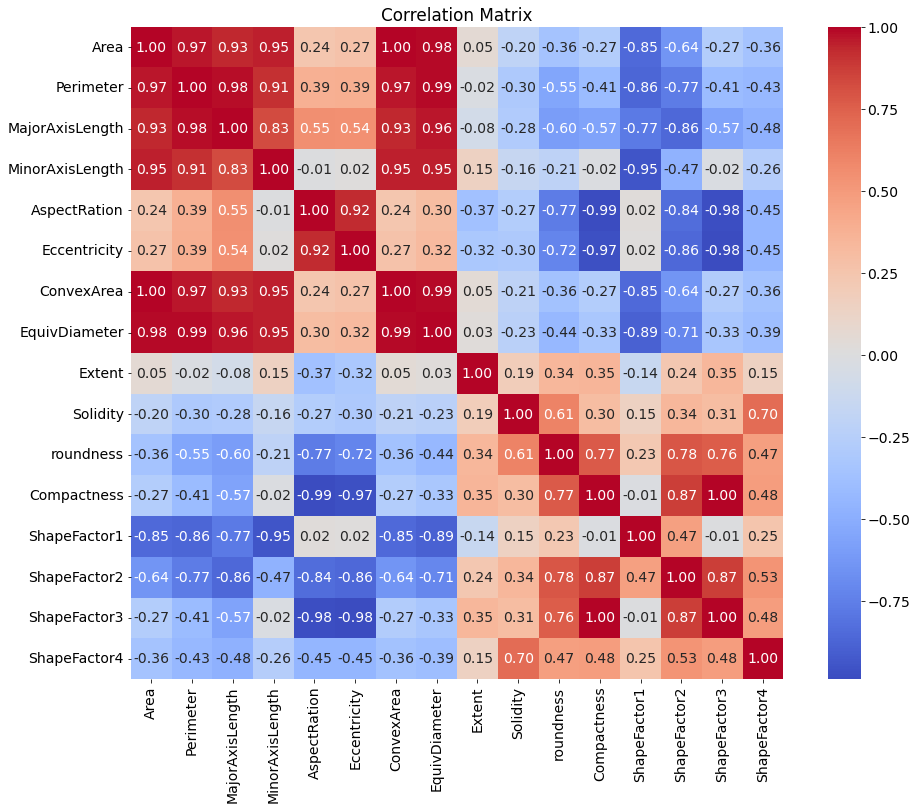

In [13]:
#=================================================-
#### Exploring the numerical variables: Correlation Matrix  ####

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

From the analysis of histograms and box plots, it is apparent that most numerical features are skewed, which can cause clustering models to be biased towards certain values and hinder accurate identification of natural groupings within the data. Additionally, the correlation plot reveals that many features are highly correlated with one another, leading to redundancy and multicollinearity, which can decrease the efficiency and accuracy of clustering algorithms.

To mitigate these issues, we will use Principal Component Analysis (PCA). PCA transforms the original set of correlated features into a smaller set of uncorrelated components that capture the majority of the variance in the data. This transformation not only reduces the dataset's dimensionality, improving the efficiency of clustering algorithms, but also helps to normalize skewed features, resulting in more robust and accurate clustering outcomes.

Before proceeding to PCA transformation and model building, we need to check the class labels to ensure that the dataset is balanced. This is necessary to prevent biased models that favor majority classes, ensuring accurate and reliable clustering results across all classes.

In [14]:
#=================================================-
#### Value Counts of the Class Labels  ####

df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

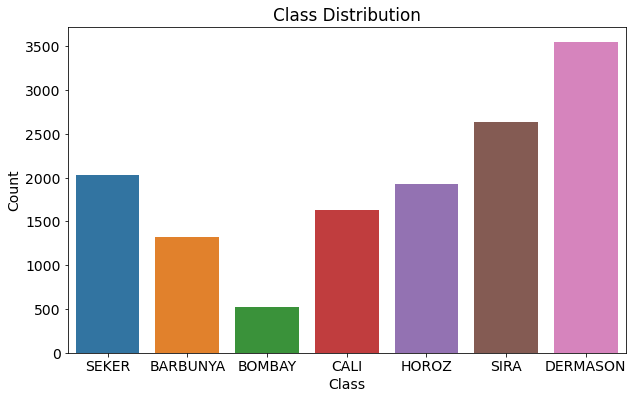

In [15]:
#=================================================-
#### Plot Value Counts of the Class Labels  ####

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

From the value counts, it is clear that the class labels are not completely balanced. However, there appear to be enough labels to potentially avoid significant issues with minority class accuracy. We will pay closer attention to this when we analyze the model results, specifically looking at the recall, precision, and F1-score to ensure the models perform well across all classes.

### Data Transformation

As discussed, we will use PCA to reduce dimensionality and transform correlated features into uncorrelated components, capturing most data variance for better clustering.

Before applying PCA, we must standardize the data to ensure all features contribute equally. Standardizing adjusts features to have a mean of zero and a standard deviation of one, preventing larger features from skewing the analysis.

In [16]:
#=================================================-
#### Data Standarization  ####

# Standardize the data prior to PCA
from sklearn.preprocessing import StandardScaler

# Drop the class labels
numerical_features = df.drop(columns=['Class'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

We will now perform a train-test split, dividing the dataset into a training set to train the model and a test set to evaluate its performance on unseen data. 

In [17]:
#=================================================-
#### Split into train and test set  ####

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df.iloc[:,-1], test_size=0.2, random_state=17)

### Modeling - PCA

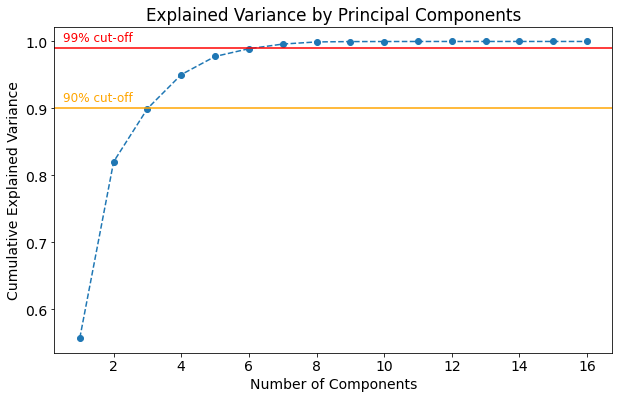

In [18]:
#=================================================-
#### PCA: build  ####

# Apply PCA
pca = PCA()
pca.fit(X_train)

# Plotting the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 1, '99% cut-off', color = 'red', fontsize=12)
plt.axhline(y=0.90, color='orange', linestyle='-')
plt.text(0.5, .91, '90% cut-off', color = 'orange', fontsize=12)
plt.show()

Looking at the cumulative explained variance from the PCA model, we find that 3 of the transformed features capture 90% of the variance in the original data, and 6 transformed features explain 99% of the variance. Below, we will build the PCA-transformed dataframe for use in our clustering models.

In [19]:
#=================================================-
#### PCA dataframe creation  ####

# Applying PCA with the optimal number of components
optimal_components = np.argmax(explained_variance >= 0.99) + 1  
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(X_train)

# Adding PCA components to the dataframe
df_pca = pd.DataFrame(data=principal_components)

In [20]:
df_pca.head()

,0,1,2,3,4,5,6
0,2.860457,-1.982534,-1.333687,0.978787,0.461428,-0.367141,0.509713
1,-1.138013,0.246564,-0.278065,0.538642,-0.480630,-0.346539,-0.123246
2,-2.575895,-0.329678,-0.302188,0.548009,-0.004842,0.384700,-0.194421
3,2.574633,0.568234,-0.430794,-0.585831,-0.412153,-0.332376,-0.413015
4,2.996930,-3.849935,-0.893278,-1.033127,0.133878,-0.106678,0.619485


### Modeling - K-Means Clustering

Our K-Means clustering model, and subsequently our Agglomerative Clustering model, will be trained with 7 clusters, as we have the actual class labels for reference. We will look at tuning other modeling parameters below.

In [53]:
#=================================================-
#### K-Means Model Building  ####

# K-Means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=17)
kmeans.fit(df_pca)

# Adding the cluster labels to the dataframe
df_pca['KMeans_Cluster'] = kmeans.labels_

In [54]:
#=================================================-
#### K-Means model output value counts  ####

df_pca['KMeans_Cluster'].value_counts()

1    2579
5    2496
6    1962
3    1630
2    1387
0     423
4     411
Name: KMeans_Cluster, dtype: int64

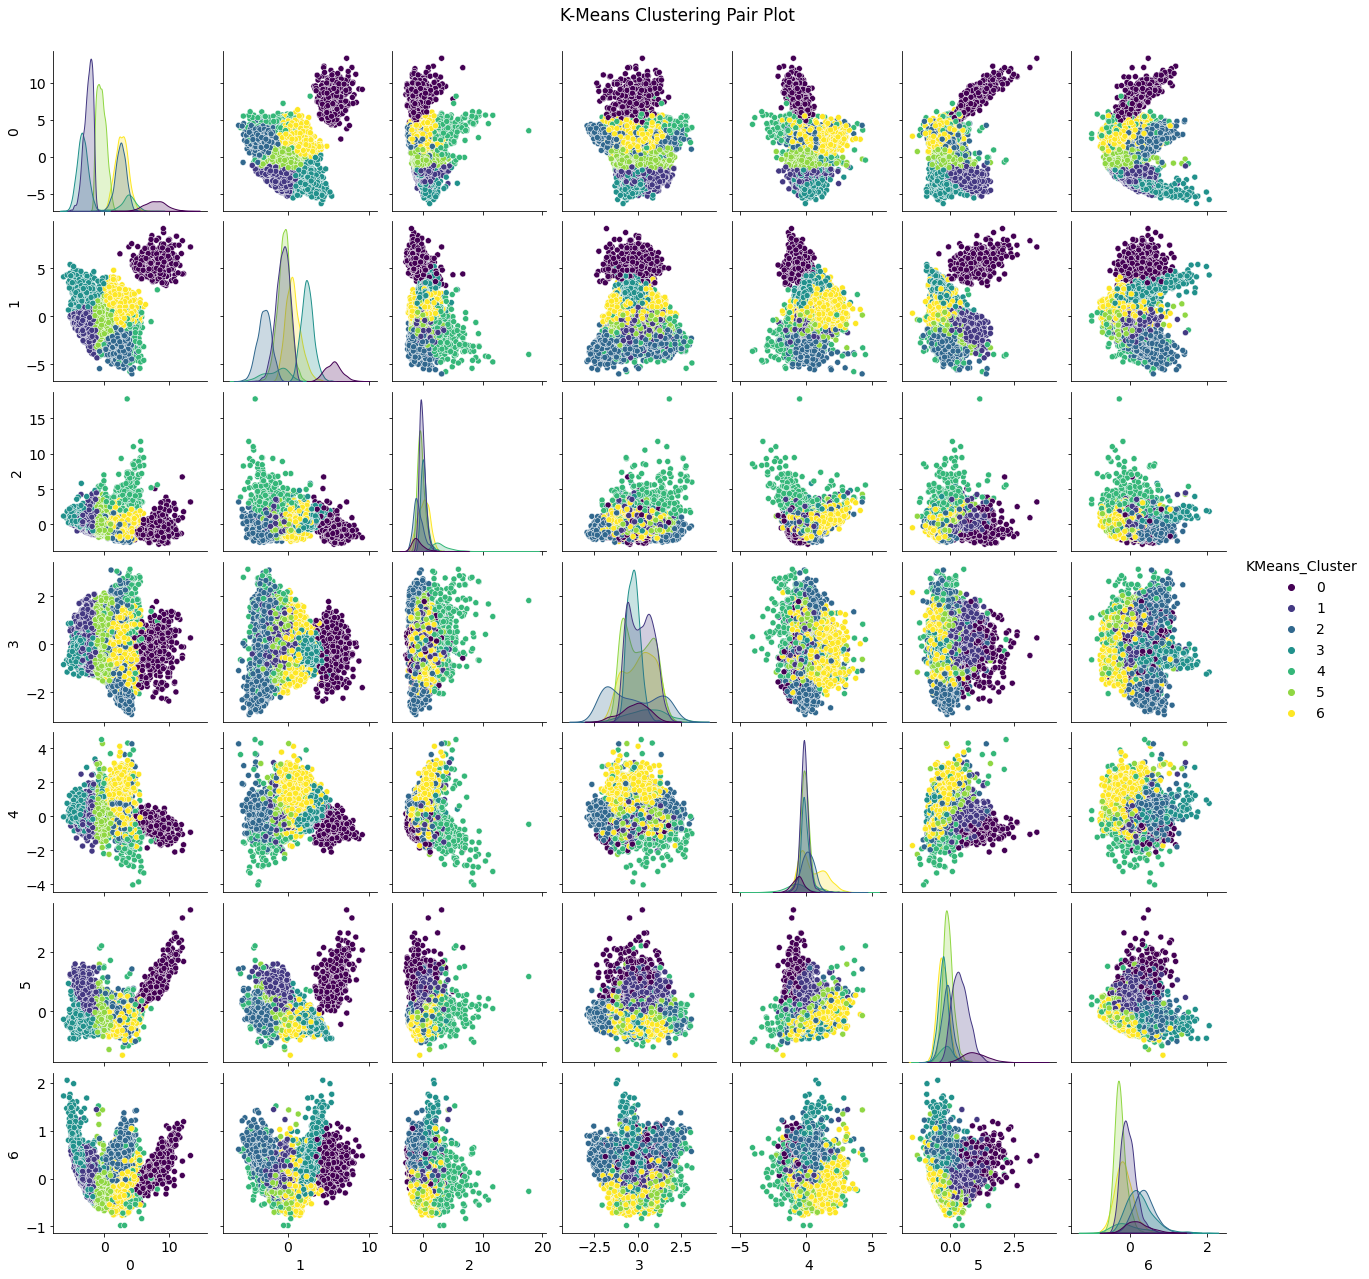

In [55]:
#=================================================-
#### K-Means Clustering Pair Plot  ####

sns.pairplot(df_pca, hue='KMeans_Cluster', palette='viridis')
plt.suptitle('K-Means Clustering Pair Plot', y=1.02)
plt.show()

In [56]:
#=================================================-
#### Function to transform model output to original labels  ####

def label_permute_compare(actual,pred,n=7):
    labels = {}
    perms = list(itertools.permutations([x for x in range(n)]))
    labels_list = list(np.unique(actual))
    final_labels = {}
  
    accuracy = 0
    permuted_labels = ()
    i = 0
    
    while i < len(perms):
        for index, key in enumerate(labels_list):
            labels[key] = perms[i][index]
            
        label_num = np.array(actual)
        for j in range(len(label_num)):
            label_num[j] = labels[label_num[j]]
    
        current_accuracy = sum(np.array(label_num)==np.array(pred))/ len(pred)
        
        if current_accuracy > accuracy:
            print(labels)
            print(current_accuracy)
            accuracy = current_accuracy
            final_labels = labels
            permuted_labels = tuple(labels.values())
            label_num_final = label_num
        

        i += 1

    return final_labels, accuracy, label_num_final

In [57]:
#=================================================-
#### Ouput from the class label model  ####

kmeans_labels, accuracy, label_num_kmeans = label_permute_compare(y_train,kmeans.labels_)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
0.03131888317413666
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 6, 'SIRA': 5}
0.19397501836884642
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 4, 'HOROZ': 6, 'SEKER': 3, 'SIRA': 5}
0.31383174136664216
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 6, 'HOROZ': 4, 'SEKER': 3, 'SIRA': 5}
0.32522042615723734
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 4, 'DERMASON': 2, 'HOROZ': 6, 'SEKER': 3, 'SIRA': 5}
0.32935341660543715
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 4, 'DERMASON': 6, 'HOROZ': 2, 'SEKER': 3, 'SIRA': 5}
0.44663850110213077
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 6, 'DERMASON': 4, 'HOROZ': 2, 'SEKER': 3, 'SIRA': 5}
0.5247060984570169
{'BARBUNYA': 0, 'BOMBAY': 2, 'CALI': 4, 'DERMASON': 1, 'HOROZ': 6, 'SEKER': 3, 'SIRA': 5}
0.5452792064658339
{'BARBUNYA': 0, 'BOMBAY': 2, 'CALI': 6, 'DERMASON': 1, 'HOROZ': 4, 'SEKER': 3, 'SIRA': 5}
0.6347354886113152
{'BARBUNYA': 

In [282]:
#=================================================-
#### Print out the accuary from the model  ####

print('Best Accuracy:',accuracy)

Best Accuracy: 0.7844415870683321


Our first model has an accuracy of 0.784, which is not bad, but let's see if we can tune some of the parameters to improve model performance.

In [206]:
#=================================================-
#### Define the parameters to tune  ####

parameters = {
    'init': ['k-means++', 'random'],
    'n_init': [10, 15, 20],
    'max_iter': [300, 600, 900],
    'tol': [1e-4, 1e-3, 1e-2]
}

n_clusters=len(list(np.unique(df['Class'])))

In [211]:
#=================================================-
#### Function for tuning the model  ####

# Function to for grid search
def kmeans_grid_search(df_input, labels, parameters):
    best_score = -1
    best_parameters = {}
    output = []
    
    for init in parameters['init']:
        for n_init in parameters['n_init']:
            for max_iter in parameters['max_iter']:
                for tol in parameters['tol']:
                    kmeans = KMeans(
                        n_clusters=n_clusters,
                        init=init,
                        n_init=n_init,
                        max_iter=max_iter,
                        tol=tol,
                        random_state=17
                    )
                    kmeans.fit(df_input)
                    
                    final_labels, accuracy, label_num_final = label_permute_compare(labels,kmeans.labels_)
                    output.append((init, n_init, max_iter, tol, accuracy))
                    
                    
                    print(init, n_init, max_iter, tol, "Accuracy:", accuracy)
                    if accuracy > best_score:
                        best_model = kmeans
                        best_score = accuracy
                        best_parameters = {
                            'init': init,
                            'n_init': n_init,
                            'max_iter': max_iter,
                            'tol': tol
                        }
    
    return best_parameters, best_score, output, best_model

In [212]:
#=================================================-
#### Ouput from model tuning  ####

best_params, best_kmeans_acc, results, best_model_kmeans = kmeans_grid_search(df_pca, y_train, param_grid)

k-means++ 10 300 0.0001 Accuracy: 0.7844415870683321
k-means++ 10 300 0.001 Accuracy: 0.7844415870683321
k-means++ 10 300 0.01 Accuracy: 0.7844415870683321
k-means++ 10 600 0.0001 Accuracy: 0.7844415870683321
k-means++ 10 600 0.001 Accuracy: 0.7844415870683321
k-means++ 10 600 0.01 Accuracy: 0.7844415870683321
k-means++ 10 900 0.0001 Accuracy: 0.7844415870683321
k-means++ 10 900 0.001 Accuracy: 0.7844415870683321
k-means++ 10 900 0.01 Accuracy: 0.7844415870683321
k-means++ 15 300 0.0001 Accuracy: 0.7844415870683321
k-means++ 15 300 0.001 Accuracy: 0.7844415870683321
k-means++ 15 300 0.01 Accuracy: 0.7844415870683321
k-means++ 15 600 0.0001 Accuracy: 0.7844415870683321
k-means++ 15 600 0.001 Accuracy: 0.7844415870683321
k-means++ 15 600 0.01 Accuracy: 0.7844415870683321
k-means++ 15 900 0.0001 Accuracy: 0.7844415870683321
k-means++ 15 900 0.001 Accuracy: 0.7844415870683321
k-means++ 15 900 0.01 Accuracy: 0.7844415870683321
k-means++ 20 300 0.0001 Accuracy: 0.7844415870683321
k-means++ 2

Looking at the grid search results above, it is clear that either the parameters being tuned do not affect our model's accuracy, or the selected ranges of values are not appropriate enough to make a significant difference.

That being said, we will stick with the original K-Means model as our final model. The following are more in-depth metrics for evaluation:

In [107]:
#=================================================-
#### Dictionary with the K-Means label mapping  ####

kmeans_labels = {'BARBUNYA': 5, 'BOMBAY': 3, 'CALI': 6, 'DERMASON': 1, 'HOROZ': 0, 'SEKER': 4, 'SIRA': 2}

In [108]:
#=================================================-
#### Swap keys and values in the labels dictionary  ####

kmeans_labels_swapped = dict([(value, key) for key, value in kmeans_labels.items()])

In [109]:
#=================================================-
#### Get test set predictions from the final K-means Model  ####

# K-means model prediction on test set
x_test_pred = pca.fit_transform(X_test)
kmeans_predictions = kmeans.fit_predict(x_test_pred)

# Transform predictions to original labels
kmeans_test_pred = []
for i in range(len(kmeans_predictions)):
    pred = kmeans_labels_swapped[kmeans_predictions[i]]
    kmeans_test_pred.append(pred)

In [110]:
#=================================================-
#### Print classification report  ####

print(classification_report(y_test, list(kmeans_test_pred)))

              precision    recall  f1-score   support

    BARBUNYA       0.47      0.86      0.61       280
      BOMBAY       0.99      0.99      0.99        98
        CALI       0.50      0.20      0.28       337
    DERMASON       0.95      0.80      0.87       690
       HOROZ       0.94      0.88      0.91       409
       SEKER       0.92      0.92      0.92       392
        SIRA       0.76      0.91      0.83       517

    accuracy                           0.79      2723
   macro avg       0.79      0.79      0.77      2723
weighted avg       0.80      0.79      0.78      2723



In [111]:
#=================================================-
#### Calculate K-means confusion matrix  ####

confusion_matrix_log = confusion_matrix(y_test, kmeans_test_pred)

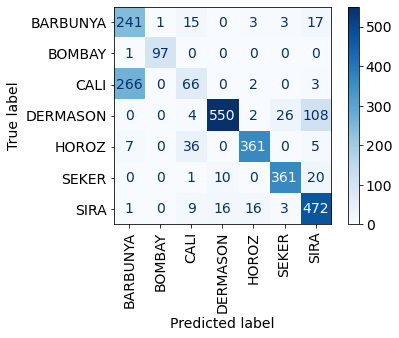

In [112]:
#=================================================-
#### Display K-means confusion matrix  ####

display_labels=['BARBUNYA','BOMBAY','CALI','DERMASON','HOROZ','SEKER','SIRA']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_log, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

From the results above, we can see that the model shows high performance for the BOMBAY class, but struggles with the CALI class. Overall accuracy is 0.79, indicating reasonable effectiveness with some room for improvement.

### Modeling - Agglomerative Clustering

The following section details the model building process for Agglomerative Clustering, which we will compare to the K-Means model:

In [160]:
#=================================================-
#### Grid Search for agglomerative clustering model  ####

# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here
linkage = ['ward', 'complete', 'average', 'single']
distance_metric = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']


def agg_cluster_grid_search(df_input, labels):
    acc_best = -1
    for i in linkage:
        for j in distance_metric:
            if i =='ward' and j!='euclidean':
                continue
            else:
                model = AgglomerativeClustering(affinity=j, linkage=i, n_clusters=n_clusters)
                model.fit(df_input)
                final_labels, accuracy, label_num_final = label_permute_compare(labels, model.labels_)
            
            print(i, j, accuracy)
            if accuracy > acc_best:
                best_model = model
                acc_best = accuracy
                link = i
                dm = j
                
    return link, dm, acc_best, best_model

In [161]:
#=================================================-
#### Print out results from agglomerative clustering model  ####

link, dm, acc_best, best_model = agg_cluster_grid_search(df_pca.iloc[:, :-1], y_train)

ward euclidean 0.7925238795003674
complete euclidean 0.5555657604702424
complete l1 0.4240448199853049
complete l2 0.5555657604702424
complete manhattan 0.4240448199853049
complete cosine 0.5200220426157237
average euclidean 0.30758633357825127
average l1 0.3072189566495224
average l2 0.30758633357825127
average manhattan 0.3072189566495224
average cosine 0.5152461425422483
single euclidean 0.26267450404114623
single l1 0.26267450404114623
single l2 0.26267450404114623
single manhattan 0.26267450404114623
single cosine 0.262582659808964


In [283]:
#=================================================-
#### Get results from best agglomerative model  ####

# best best model prediction on test set
x_test_pred = pca.fit_transform(X_test)

# Map model results to best model labels
agg_predictions = best_model.fit_predict(x_test_pred)
agg_labels, agg_accuracy, label_num_agg = label_permute_compare(y_test,agg_predictions)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
0.11090708777084099
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 5, 'SEKER': 4, 'SIRA': 6}
0.12155710613294161
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 5, 'SEKER': 6, 'SIRA': 4}
0.2827763496143959
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 6, 'SEKER': 5, 'SIRA': 4}
0.302240176276166
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 5, 'HOROZ': 6, 'SEKER': 3, 'SIRA': 4}
0.4197576202717591
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 3, 'DERMASON': 2, 'HOROZ': 5, 'SEKER': 6, 'SIRA': 4}
0.4755784061696658
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 3, 'DERMASON': 2, 'HOROZ': 6, 'SEKER': 5, 'SIRA': 4}
0.4950422328314359
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 5, 'DERMASON': 2, 'HOROZ': 6, 'SEKER': 3, 'SIRA': 4}
0.6191700330517811
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 6, 'DERMASON': 2, 'HOROZ': 5, 'SEKER': 3, 'SIRA': 4}
0.6239441792141021
{'BARBUNYA': 0, 'B

In [284]:
#=================================================-
#### Dictionary with the agglomerative clustering label mapping  ####

agg_labels = {'BARBUNYA': 0, 'BOMBAY': 5, 'CALI': 6, 'DERMASON': 2, 'HOROZ': 1, 'SEKER': 3, 'SIRA': 4}

In [285]:
#=================================================-
#### Swap keys and values in the labels dictionary  ####

agg_labels_swapped = dict([(value, key) for key, value in agg_labels.items()])

{0: 'BARBUNYA',
 5: 'BOMBAY',
 6: 'CALI',
 2: 'DERMASON',
 1: 'HOROZ',
 3: 'SEKER',
 4: 'SIRA'}

In [288]:
#=================================================-
#### Transform predictions to original labels  ####
 
y_test_pred = []
for i in range(len(agg_predictions)):
    pred = agg_labels_swapped[agg_predictions[i]]
    y_test_pred.append(pred)

In [289]:
#=================================================-
#### Print out aalomerative clustering classification report  ####

print(classification_report(y_test, list(y_test_pred)))

              precision    recall  f1-score   support

    BARBUNYA       0.49      0.95      0.64       280
      BOMBAY       1.00      1.00      1.00        98
        CALI       0.48      0.20      0.28       337
    DERMASON       0.96      0.79      0.86       690
       HOROZ       0.98      0.82      0.89       409
       SEKER       0.94      0.86      0.90       392
        SIRA       0.72      0.94      0.82       517

    accuracy                           0.78      2723
   macro avg       0.80      0.79      0.77      2723
weighted avg       0.81      0.78      0.77      2723



In [290]:
#=================================================-
#### Calculate agglomerative clustering confusion matrix  ####

confusion_matrix_log = confusion_matrix(y_test, y_test_pred)

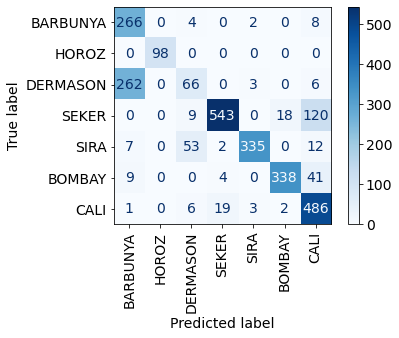

In [294]:
#=================================================-
#### Display agglomerative clustering confusion matrix  ####

display_labels=['BARBUNYA','HOROZ','DERMASON', 'SEKER','SIRA','BOMBAY','CALI']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_log, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

Looking at the results above, it is clear that the model performs best for the BOMBAY class with perfect scores, while the CALI class has the lowest performance. The overall accuracy is 0.78, indicating that the model is generally effective but has room for improvement in certain classes.

### Conclusions

Both the K-Means and Agglomerative Clustering models were evaluated for their performance in classifying dry bean varieties. The K-Means model achieved an accuracy of 0.78, while the Agglomerative Clustering model performed slightly better with an accuracy of 0.79.

The K-Means model demonstrated its best performance with the BOMBAY class, achieving perfect precision, recall, and F1-score. However, it struggled significantly with the CALI class, showing low recall (0.20) and F1-score (0.28). Overall, the macro averages for precision, recall, and F1-score were 0.80, 0.79, and 0.77, respectively.

Agglomerative Clustering also performed exceptionally well for the BOMBAY class, with near-perfect precision, recall, and F1-score. Similar to the K-Means model, it struggled with the CALI class, with a low recall (0.20) and F1-score (0.28). The macro averages for precision, recall, and F1-score were slightly lower at 0.79, 0.79, and 0.77, respectively, but the model had a slightly better overall accuracy.

In conclusion, both models performed well, with Agglomerative Clustering showing a slight edge in overall accuracy. However, both models had difficulties with the CALI class, indicating a need for further tuning or alternative approaches to improve performance in this category. These results suggest that clustering models can effectively classify dry bean varieties, though there is room for improvement, especially with certain classes.